<center><h1> Groupwork Project 1 - Group 6B</h1></center>
<center><h1> MScFE 650 - Portfolio Theory and Asset Pricing </h1></center>

<br>

<center><h3>Groupwork Members:</h3><br>Hai Ninh Hoang (haininhhoang94@gmail.com)<br>Quyen Ho Thanh(thquyen11@hotmail.com)<br>Wei Hao Lew (lewweihao93@hotmail.com)<br>Indira Djambaeva (idjamboeva@mail.ru)<br></center>

# Submission 2

Using the data that you calculated in Submission 1, complete the following tasks (use the data
in the <b>"GWP_PTAP_Data.xlsx"</b> spreadsheet provided in the course room):

### 1. Calculate and draw a scatter plot graph of the efficient frontier based on 11 combinations of XLE and XLI
    - Portfolio 1 = 100% XLE + 0% XLI
    - Portfolio 2 = 90% XLE + 10% XLI
    - .....
    - Portfolio 11 = 0% XLE + 100% XLI

### 2. Select a portfolio from portfolios 1-11 on the efficient frontier that satisfies the following constrants:
    - The return is greater than 9.43%
    - The volatility is not greater than 16.8%

### 3. Comment on how the portfolio selected in Submission 2(b) is expected to perform relative to the S&P 500 in terms of the following:
    - Return
    - Risk
    - Risk-adjusted return, including the Sharpe Ratio

### 4. Comment on the appropriateness of the S&P 500 as a benchmark for the portfolio.

<b>Explain the calculations required to accomplish each task</b>

Make sure to use feedback your group received for your previous submission


# Answer

In this assignment, it is required to use the previous Submission 1 results, so we use the following Correlation, Annualized Return Standard Deviation, and Expected Return as below

$ \rho_{XLE, XLI}  = 0.658 $<br>
$ \sigma_{XLE} = 0.202 $<br>
$ \sigma_{XLI} = 0.170 $<br>
$ R_{XLE} = 0.095 $<br>
$ R_{XLI} = 0.094 $<br>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
correlation_XLE_XLI = 0.6583199452866898 
annualized_return_std_XLE = 0.20185727382480237
annualized_return_std_XLI = 0.16993528928820395
return_XLE = 0.094725
return_XLI = 0.09405

### 1. Calculate and draw a scatter plot graph of the efficient frontier based on 11 combinations of XLE and XLI
    - Portfolio 1 = 100% XLE + 0% XLI
    - Portfolio 2 = 90% XLE + 10% XLI
    - .....
    - Portfolio 11 = 0% XLE + 100% XLI

In [3]:
xle_percent = np.linspace(100, 0, 11)
xli_percent = np.linspace(0, 100, 11)
index = ["Portfolio 1", "Portfolio 2", "Portfolio 3", "Portfolio 4", "Portfolio 5", "Portfolio 6", "Portfolio 7", "Portfolio 8", "Portfolio 9", "Portfolio 10", "Portfolio 11",]
portfolios = pd.DataFrame(index=index, columns=["XLE %", "XLI %", "Expected Return", "Std. Volatility"])
portfolios["XLE %"] = xle_percent
portfolios["XLI %"] = xli_percent
portfolios.fillna(0, inplace=True)

Based on Module 1, Portfolio Theory and Asset Pricing, the Efficicent Frontier is consist of the Volatility of the Portfolio as the horizontal axis, and the Expected Return of the Portfolio as the vertical axis.

In order to draw the Efficicent Frontier, we calculate the Return and Volatility of the Portfolio by using the following equation: 

<b>Expected Return of an Portfolio</b>

$$ R_p = \sum_{i=1}^n {R_i * w_i} $$

where: <br>
$ R_p $: Expected Return of the Portfolio<br>
$ R_i $: Expected Return of the Asset<br>
$ w_i $: Weight of the Asset in the Portfolio<br>

<b>Volatility of an Portfolio (consist of two asset, can be called Two-aseet Portfolio):</b>

$$ \rho_p = \sqrt{w_1^2 * \sigma_1^2 + w_2^2 * \sigma_2^2 + 2*w_1*\sigma_1*w_2*\sigma_2*\rho_{1,2}} $$

where: <br>
$ \rho_p $ : Volatility of the Two-asset Portfolio<br>
$ w_1, w_2 $: Weight of asset 1 and 2 in the Portfolio respectively<br>
$ \sigma_1, \sigma_2 $: Volatility of asset 1 and 2 in Portfolio respectively<br>
$ \rho_{1,2} $: Correlation between asset 1 and assets 2 returns<br>

If the Portfolio is consist of more than two assets, the <b>General Equation of Volatility of the Portfolio</b> should be:

$$ \sigma_p = \sqrt{\sum_{i=1}^n w_i^2*\sigma_i^2 + \sum_{i,j=1,i \neq j}^n w_i*w_j*\sigma_i*\sigma_j*\rho_{i,j}} $$

Apply the Correlation, Annualized Standard Deviation, Annualized Expected Return of XLE and XLI from the above we create the following result table:

In [4]:
portfolios["Expected Return"] = return_XLE*portfolios["XLE %"]/100 + return_XLI*portfolios["XLI %"]/100
portfolios["Std. Volatility"] = np.sqrt((annualized_return_std_XLE**2)*(portfolios["XLE %"]/100)**2 + (annualized_return_std_XLI**2)*(portfolios["XLI %"]/100)**2 + 2*annualized_return_std_XLE*annualized_return_std_XLI*(portfolios["XLE %"]/100)*(portfolios["XLI %"]/100)*correlation_XLE_XLI)

portfolios

,XLE %,XLI %,Expected Return,Std. Volatility
Portfolio 1,100.0,0.0,0.094725,0.201857
Portfolio 2,90.0,10.0,0.094657,0.193282
Portfolio 3,80.0,20.0,0.094590,0.185632
Portfolio 4,70.0,30.0,0.094523,0.179023
Portfolio 5,60.0,40.0,0.094455,0.173576
Portfolio 6,50.0,50.0,0.094387,0.169402
Portfolio 7,40.0,60.0,0.094320,0.166598
Portfolio 8,30.0,70.0,0.094253,0.165233
Portfolio 9,20.0,80.0,0.094185,0.165342
Portfolio 10,10.0,90.0,0.094117,0.166923


From this data table, we create the Efficient Frontier graph as below: 

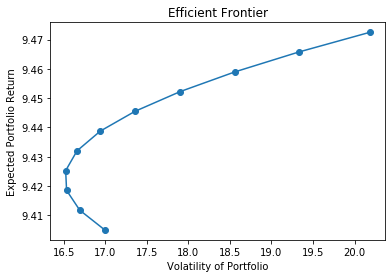

In [5]:
plt.plot(portfolios["Std. Volatility"]*100, portfolios["Expected Return"]*100, 'o-')
plt.title("Efficient Frontier")
plt.ylabel("Expected Portfolio Return")
plt.xlabel("Volatility of Portfolio")
plt.show()

### 2. Select a portfolio from portfolios 1-11 on the efficient frontier that satisfies the following constrants:
    - The return is greater than 9.43%
    - The volatility is not greater than 16.8%

From the 11 Portfolios above we will choose a Portfolio with:<br>
$ R_p > 9.43% $<br>
$ \sigma_p \leq 16.8% $<br>

The result is shown below:

In [6]:
return_threshold = 0.0943
volatility_threshold = 0.168
optimal_portfolio = portfolios.loc[(portfolios["Expected Return"] > return_threshold) & (portfolios["Std. Volatility"] <= volatility_threshold)]
optimal_portfolio

,XLE %,XLI %,Expected Return,Std. Volatility
Portfolio 7,40.0,60.0,0.09432,0.166598


Portfolio 7 is made of 40% XLE and 60% XLE, with the Expected Return of 0.094 and Volatility of 0.167.

### 3. Comment on how the portfolio selected in Submission 2(b) is expected to perform relative to the S&P 500 in terms of the following:
    - Return
    - Risk
    - Risk-adjusted return, including the Sharpe Ratio

Given that both XLI and XLE have positive beta, combining them in any proportions into a portfolio will definitely result in an expected return which is higher than S&P 500, which is taken to be the market, and has an expected return of 9%.(As given in previous assignment). In fact, the expected return of this portfolio can be calcuated by the weighted average of the expected return of each of the individual assets.

Portfolio expected return = 0.4 x 9.4725% + 0.6 x 9.405% = 9.432%

The volatility of this portfolio is 16.66%, as compared to the S&P 500 volatility of 15%. (Market volatility) Hence, this portfolio has a higher risk than S&P500.

The Sharpe ratio is given by

$Sharpe Ratio = \frac{Asset Return - Risk Free Rate}{Volatility of Asset}$

S&P500 Sharpe Ratio = (9 - 2.25)/15 = 0.45

Portfolio Sharpe Ratio = (9.432 - 2.25)/16.66 = 0.431

Hence, the S&P500 still has a higher sharpe ratio than the portfolio.

### 4. Comment on the appropriateness of the S&P 500 as a benchmark for the portfolio.

The S&P 500 is appropriate to some extent as the XLE and XLI indices are both created out of taking some assets from the S&P500 index. However, the XLE only tracks the energy sector of the S&P500 while the XLI only tracks the industrial sector of the S&P 500. Hence, using S&P500 as a benchmark for this portfolio has its limitations as the S&P500 index contains other sectors that are not being represented by the portfolio, like healthcare and technology. This results in inconsistencies as other irrelevant sectors will impact the benchmark performance without impacting the portfolio. Hence, using another benchmark index that focuses primarily on the energy sector and industrial sector would be more reliable.